# {Concussion Protocol }📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem I'm trying to address relates to the frequent concussions in professional football, which often times leads to CTE (Chronic Traumatic Encephalopathy) after the playing career. This has a large impact on the brains ability to process and respond to information, as well as many other negatives effects that inhibit ones ability to continue living their life. I'd like to look into current trends in professional football (NCAA/NFL) regarding concussion protocol and see how things have shifted in recent years as technology has advanced. In theory, you'd assume the amount of concussions would be reduced due to the new technology within the helmets to help with traumatic blows to the head area, but it seems as though the number of concussions has stayed relatively the same throughout everything. I'd like to research this more.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

The questions I'm trying to answer would be: 
- Are there a certain amount of career concussions that we can point to as a threshold for CTE? If so, what is that number? 
- How much time do players in concussion protocol typically miss? Does this differ by age or position?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

An answer may look like: 
- At 6 concussions and beyond in an athletes playing career, they are statistically likely to be diagnosed with CTE.
- At 4 career concussions, the likelihood of being diagnosed with CTE jumps significantly.
- In the NFL, players at skill positions (QB, WR, RB, DB) typically miss more time while being in concussion protocol.
- Players between ages 21-25 spend significantly less time in concussion protocol in comparison to players aged 26-30.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Data Source 1: https://www.prosportstransactions.com/football/Search/Search.php
- NFL injury database, allowing people to view all injury designations throughout past NFL seasons.

Data Source 2: https://www.nfl.com/injuries/
- Similar to the first data source but is updated with the current season, which could be beneficial to see if any trends have shifted or started this year that differ from previous years.

Data Source 3: https://www.kaggle.com/code/mpwolke/nfl-concussions/notebook
- NFL concussion data beyond simply the injury designation. Showcases # of weeks in concussion list among many other things.

Data Source 4: https://www.nfl.com/playerhealthandsafety/health-and-wellness/injury-data/injury-data
- NFL concussion data in totals grouped by year.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

 My initial approach will be to filter the number of days between the announcement of a player in concussion protocol and the day they get cleared from protocol, so I can get a better grasp on how long a typical concussion sidelines a player. From there, it's diving into the data based on several different factors: age, position, teams W-L at time of injury, etc. to see what plays into the length of a concussion protocol stay. I'd also like to look at the yearly concussion data, to see if theres been any trends with the technological advances in the sport (helmet padding, rule changes to protect helmet-to-helmet collisions, guardian cap introduction) in recent years.

## CHECKPOINT 2

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


## Exploratory Data Analysis
Data Visualization
You should use several visualizations to help answer the questions above.

You should have at least 4 visualizations in your notebook, to represent different aspects and valuable insights of your data.
You can use 2 visualization library that you want.
You can use any type of visualization that best represents your data.
You'll need to provide a short description of each visualization and explain what it represents, and what insights you can extract from it.

VISUALIZATION 1

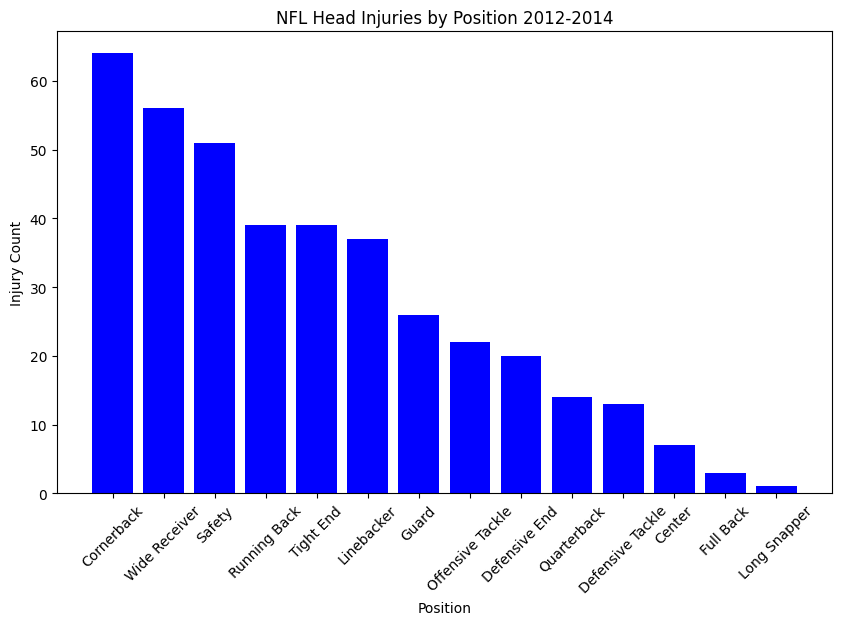

In [31]:
file_path = '/Users/matt/Documents/GitHub/final-project-jenkinsmt/Concussion Injuries 2012-2014.csv' 
df = pd.read_csv(file_path)

# Replace typo in dataset in 'Position' column from 'Comerback' to 'Cornerback'
df['Position'] = df['Position'].replace('Comerback', 'Cornerback')

position_tally = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(position_tally.index, position_tally.values, color='blue')
plt.xlabel('Position')
plt.ylabel('Injury Count')
plt.title('NFL Head Injuries by Position 2012-2014')
plt.xticks(rotation=45)  
plt.show()



The above data visualization is a bar graph that counts the number of head injuries by position in the NFL from 2012 to 2014. This shows that the skill positions (wide receiver, running back, tight end) and secondary positions (cornerback, safety) are the groups that suffer from head injuries most often. The cornerback number being higher than the wide reciever number is interesting, as I thought those would be swapped due to the offensive vs defensive nature of the positions. There was a typo with the 'cornerback' position within the dataset, so I used the replace function to make the change from 'comerback' to the correct 'cornerback' for the position name.

VISUALIZATION 2

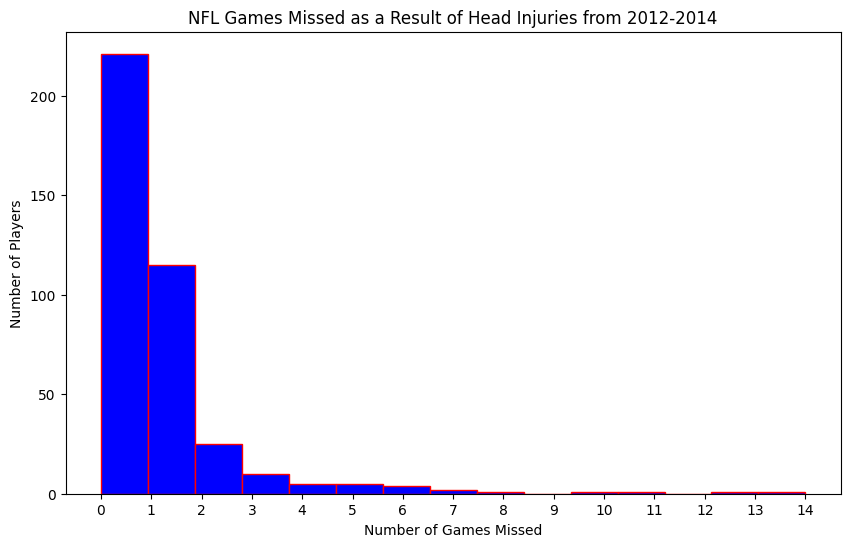

In [39]:
file_path = '/Users/matt/Documents/GitHub/final-project-jenkinsmt/Concussion Injuries 2012-2014.csv' 
df = pd.read_csv(file_path)

# Replace empty cells in the 'Games Missed' column with 0
df['Games Missed'] = df['Games Missed'].fillna(0)

plt.figure(figsize=(10, 6))
plt.hist(df['Games Missed'], bins=15, color='blue', edgecolor='red', range=(0, 14))
plt.title("NFL Games Missed as a Result of Head Injuries from 2012-2014")
plt.xlabel("Number of Games Missed")
plt.ylabel("Number of Players")
plt.xticks(range(0, 15))
plt.show()

For visualization #2, I created a histogram that showcases the number of games a player missed as a direct result of a head injury. One of the issues I ran into while working on this was that there was a decent chunk of null values in the 'Games Missed' column in the dataset, which meant that the player returned to the game that they were injured in. To combat the null values, I used the .fillna function to assign all of these the value of 0. Looking at the visualization, players are typically only sidelined for 0-1 week, with the occasional injury resulting in more games missed. 

VISUALIZATION 3

In [64]:
data = pd.read_csv("concussion_data_2015_2023.csv")

# Change 'year' column to datetime format
if 'year' in data.columns and 'final total' in data.columns:
    data['year'] = pd.to_datetime(data['year'], format='%Y')
    
fig = px.line(data, x='year', y='final total', title='Yearly Concussions in NFL 2015-2023', labels={'year': 'Year', 'final total': 'Total Concussions'}, markers=True)
fig.show()


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Visualization 3 is a time-series plot that showcases the year-to-year concussion totals in the NFL from 2015 to 2023. This plot used plotly unlike the previous 2 which used matplotlib. An issue I ran into was the formatting for the 'year' column on the x-axis, as the way it was displayed needed to be altered which is where the 'if' statement comes into play in the coding cell. Looking for possible insights from the visualization, we see that in a general sense the total number of concussions has decreased over time, but looking at the more recent years we see it creeping back up. The mid 2010's is when the NFL began taking concussions and head injuries more seriously, both with in-game penalization as well as in the health protocols, which lines up with the plots initial decrease from 2015 to 2020. 

VISUALIZATION 4

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



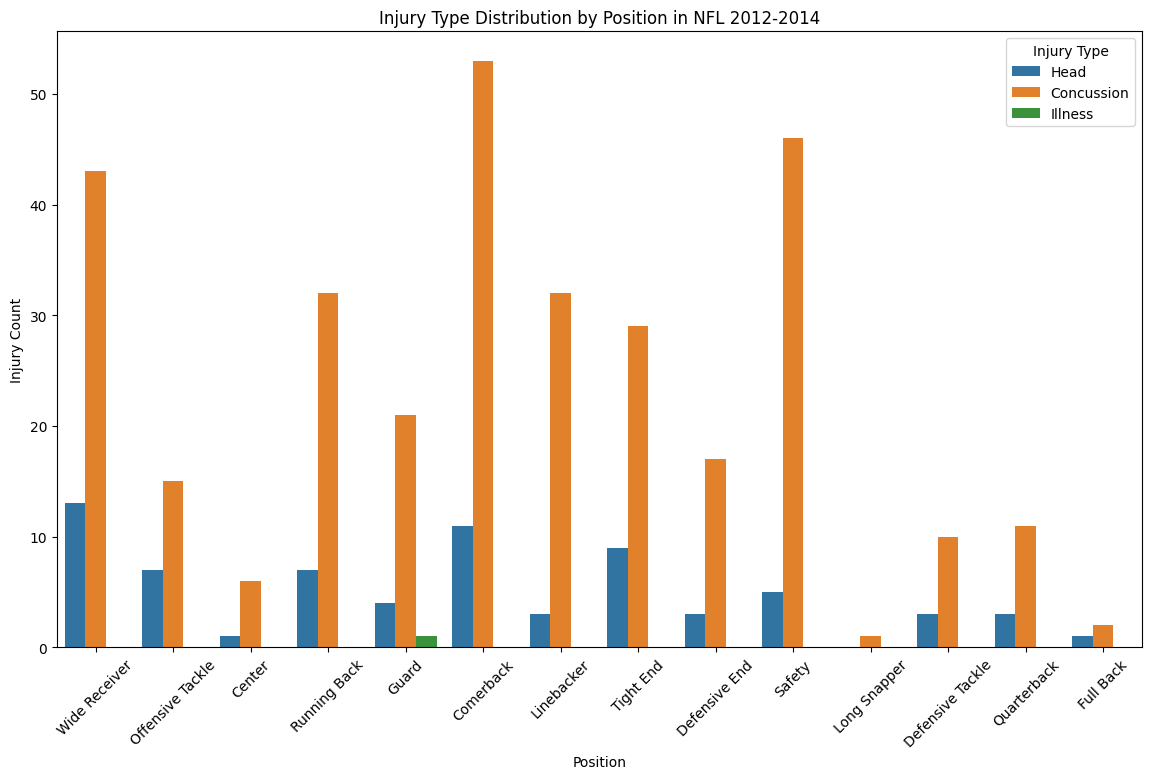

In [71]:
data = pd.read_csv("/Users/matt/Documents/GitHub/final-project-jenkinsmt/Concussion Injuries 2012-2014.csv")

# Plotting: count injuries by Position and Injury Type
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Position', hue='Reported Injury Type')
plt.title('Injury Type Distribution by Position in NFL 2012-2014')
plt.xlabel('Position')
plt.ylabel('Injury Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.show()


Visualization 4 is bar graph that showcases head injuries by position based, segmented into whether or not the injury is specified as a concussion, unlisted head injury, or an illness in the rare case. This gives us a deeper look at the injuries than simply looking at the injuries per position. I think most people hear about a head injury in the NFL and automatically assume it's a concussion when that's not always the case, as shown in this graph.

# DATA CLEANING AND TRANSFORMATION

Initially with the 'Concussion Injuries 2012-2014.csv' dataset, I handled missing values in columns like 'Games Missed' and 'Weeks Injured,' where gaps in data could affect calculations and analysis. For these numerical columns, missing values were filled with 0 where appropriate, as the absence of data likely indicated no games were missed. The correct positional name, 'cornerback', was misspelled throughout the dataset, as 'comerback', which could've led to confusion when displaying the data. I used the .replace function to change the name whenever that specific entry showed up when cycling through the dataset. When using the 'concussion_data_2015_2023.csv' dataset, I had to adjust the 'year' column formatting to fit the time-series plot parameters, which now shows 'Jan 2021' as the year.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

The four datasets listed above in the 'Data Sources' section are the only resources/references I've used thus far.

In [72]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 10549 bytes to source.py
